For comparison of predicted and ground truth BINARY masks

In [1]:
import numpy as np
import cv2
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import tkinter
from tkinter import filedialog
from sklearn.metrics import jaccard_score
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [8]:
path1=filedialog.askdirectory(title='CD3P_GT')
path2=filedialog.askdirectory(title='CD3N_GT')
path3=filedialog.askdirectory(title='CD3P_Pred')
path4=filedialog.askdirectory(title='CD3N_Pred')
cd3p_gt=sorted(glob(path1+"/*"))
cd3n_gt=sorted(glob(path2+"/*"))
cd3p_pred=sorted(glob(path3+"/*"))
cd3n_pred=sorted(glob(path4+"/*"))
path5=filedialog.askdirectory(title='results')

In [11]:
path5

'/home/saab/Desktop/Validation_tiles_revised/Serial/Results'

In [9]:
print(cd3p_gt[:2])
print(cd3p_pred[:2])
print(cd3n_gt[:2])
print(cd3n_pred[:2])

['/home/saab/Desktop/Validation_tiles_revised/Serial/CD3P/GT/000.npy', '/home/saab/Desktop/Validation_tiles_revised/Serial/CD3P/GT/001.npy']
['/home/saab/Desktop/Validation_tiles_revised/Serial/CD3P/Pred/000.npy', '/home/saab/Desktop/Validation_tiles_revised/Serial/CD3P/Pred/001.npy']
['/home/saab/Desktop/Validation_tiles_revised/Serial/CD3N/GT/000.npy', '/home/saab/Desktop/Validation_tiles_revised/Serial/CD3N/GT/001.npy']
['/home/saab/Desktop/Validation_tiles_revised/Serial/CD3N/Pred/000.npy', '/home/saab/Desktop/Validation_tiles_revised/Serial/CD3N/Pred/001.npy']


In [10]:
#Simple check to ensure same non-zero number of images going in
len(cd3p_gt)==len(cd3n_gt)==len(cd3n_pred)==len(cd3p_pred)!=0

True

In [12]:




for i in range(len(cd3p_gt)):
    l_p=[]

    lst_p=[]

    l_tf_p=[]

    lst_n=[]

    l_tf_n=[]
    t_cd3p_gt=sorted(glob(cd3p_gt[i]+"/*.npy"))
    t_cd3p_pr=sorted(glob(cd3p_pred[i]+"/*.npy"))
    t_cd3n_gt=sorted(glob(cd3n_gt[i]+"/*.npy"))
    t_cd3n_pr=sorted(glob(cd3n_pred[i]+"/*.npy"))
    for j in range(len(t_cd3p_gt)):
        img1=np.load(t_cd3p_gt[j])
        img2=np.load(t_cd3p_pr[j])
        img3=img1*np.logical_and(img1,img2)

        img4=np.load(t_cd3n_gt[j])
        img5=np.load(t_cd3n_pr[j])
        img6=img4*np.logical_and(img4,img5)


        l_p.append(t_cd3p_gt[j].split("/")[-1])

        v1,c1=np.unique(img1,return_counts=True)
        v2,c2=np.unique(img3,return_counts=True)
        lst_p.append(len(v1))
        l_tf_p.append(len(set(v1)&set(v2)))


        v3,c3=np.unique(img4,return_counts=True)
        v4,c4=np.unique(img6,return_counts=True)
        lst_n.append(len(v3))
        l_tf_n.append(len(set(v3)&set(v4)))
    #a1=np.average(lst)
    #a2=np.average(l_tf)
    #lst_p.append(a1)
    #l_tf_p.append(a2)
    #lst_p.append(a1)
    #l_tf_p.append(a2)
    #l_p.append("Total")
    df=pd.DataFrame({'name': l_p,'GT_CD3P':lst_p,'Pred_CD3P':l_tf_p,'GT_CD3N':lst_n,'Pred_CD3N':l_tf_n})
    #path3=filedialog.askdirectory(title='path for csv')
    df.to_csv(path5+"/"+f"{i:03d}"+".csv",index=False)

In [21]:
a=np.load('/home/saab/Desktop/Validation_Pred_IoU/same/000.npy')
b=np.load('/home/saab/Desktop/Validation_Pred_IoU/serial/000.npy')
c=np.load('/home/saab/Desktop/000.npy')

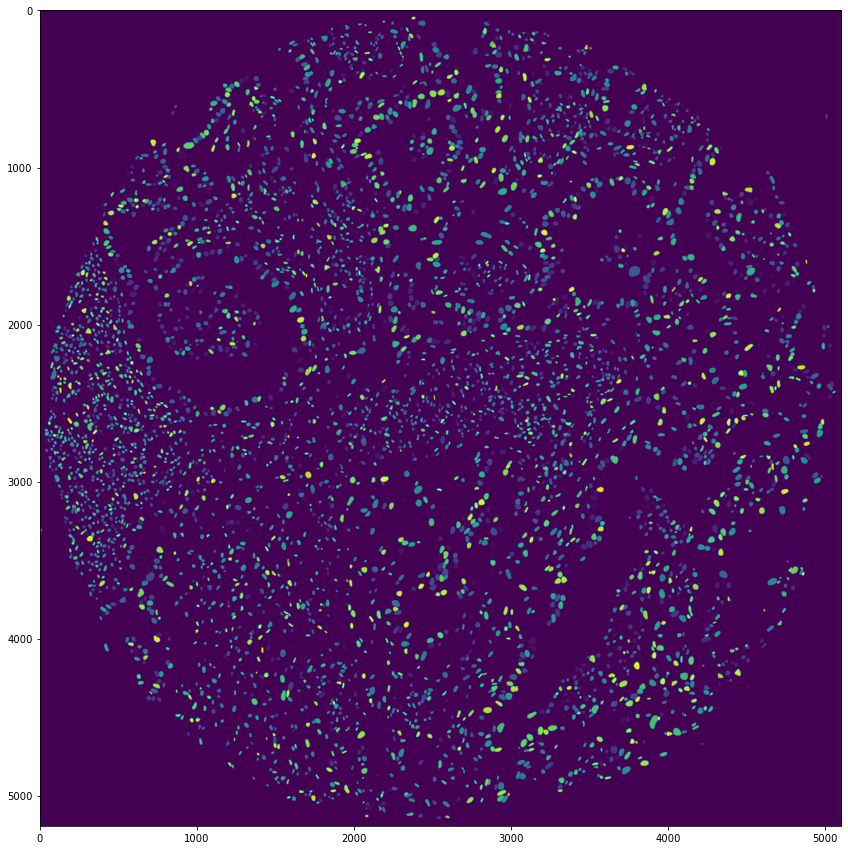

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(a)

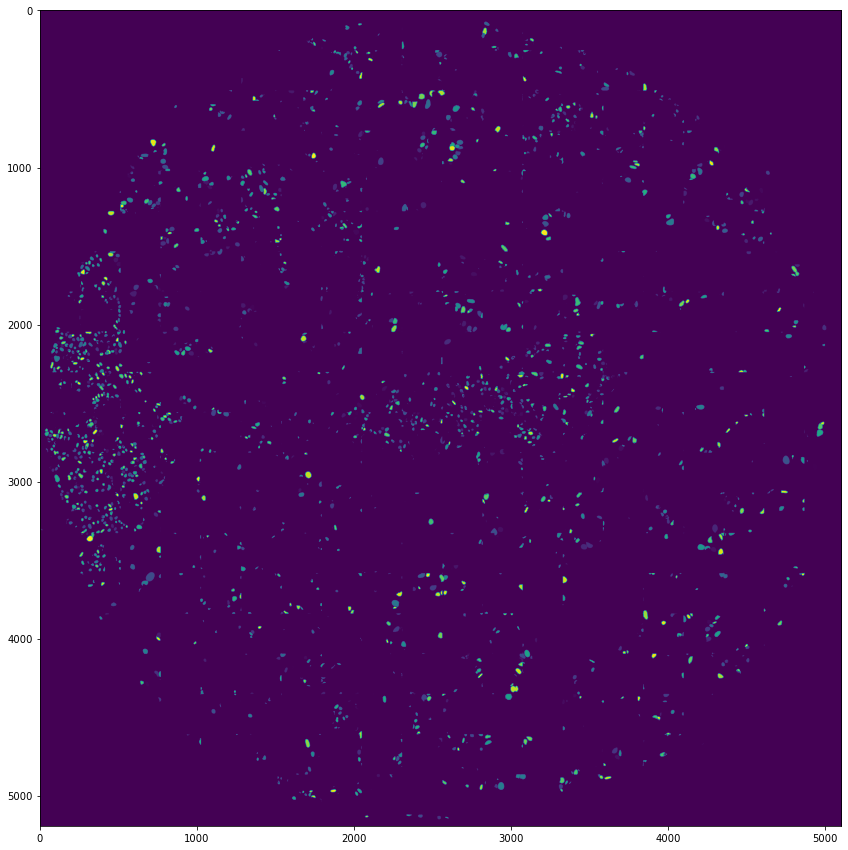

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(b)

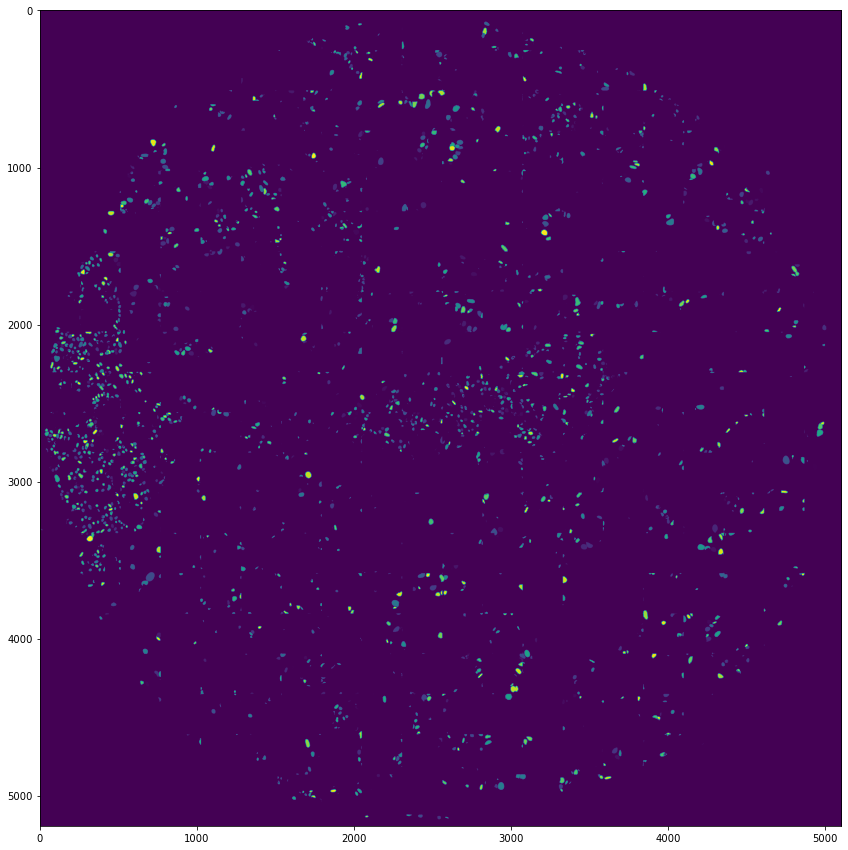

In [23]:
plt.figure(figsize=(15,15))
plt.imshow(b)

In [8]:
v2,c2=np.unique(c,return_counts=True)

In [10]:
len(v2)

1320